# Gaussian Method

The code below was created during the completion of the AWS Machine Learning Foundations Program from Udacity. It basically creates a method for calculating basic metrics of a Gaussian Distribution, and generates Histogram plot and Probability Density Function for a giving value.

In [2]:
import math
import matplotlib.pyplot as plt

class Gaussian():
    """ Gaussian distribution class for calculating and 
    visualizing a Gaussian distribution.
    
    Attributes:
        mean (float) representing the mean value of the distribution
        stdev (float) representing the standard deviation of the distribution
        data_list (list of floats) a list of floats extracted from the data file
            
    """
    def __init__(self, mu = 0, sigma = 1):
        
        self.mean = mu
        self.stdev = sigma
        self.data = []

    
    def calculate_mean(self):
    
        """Method to calculate the mean of the data set.
        
        Args: 
            None
        
        Returns: 
            float: mean of the data set
    
        """
        
        if len(self.data) != 0:
            
            mean_total = 0
            
            for i in self.data:
                mean_total += i
            
            mean = mean_total / len(self.data)
            
            self.mean = mean
            
            return self.mean
        
        else:
            pass
        
        
    def calculate_stdev(self, sample=True):

        """Method to calculate the standard deviation of the data set.
        
        Args: 
            sample (bool): whether the data represents a sample or population
        
        Returns: 
            float: standard deviation of the data set
    
        """

        sum_std_dev = 0
        
        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
            
        for i in self.data:
            sum_std_dev += (i - self.mean) ** 2
            
        std_dev = math.sqrt(sum_std_dev / n)
            
        self.stdev = std_dev
                           
        return self.stdev
            
        

    def read_data_file(self, file_name, sample=True):
    
        """Method to read in data from a txt file. The txt file should have
        one number (float) per line. The numbers are stored in the data attribute. 
        After reading in the file, the mean and standard deviation are calculated
                
        Args:
            file_name (string): name of a file to read from
        
        Returns:
            None
        
        """
        with open(file_name) as file:
            data_list = []
            line = file.readline()
            while line:
                data_list.append(int(line))
                line = file.readline()
        file.close()
           
        self.data = data_list
        self.mean = self.calculate_mean()
        self.stdev = self.calculate_stdev(sample)
                
        
    def plot_histogram(self):
        """Method to output a histogram of the instance variable data using 
        matplotlib pyplot library.
        
        Args:
            None
            
        Returns:
            None
        """
     
        plt.hist(self.data)
        plt.title('Histogram Model')
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()
                                
        
    def pdf(self, x):
        """Probability density function calculator for the gaussian distribution.
        
        Args:
            x (float): point for calculating the probability density function
            
        
        Returns:
            float: probability density function output
        """
                  
        pdf_function = (1 / math.sqrt(2 * math.pi * self.stdev ** 2)) * math.exp(- (x - self.mean) ** 2 / 2 * self.stdev ** 2)
        
        return pdf_function
   

    def __add__(self, other):
        
        """Magic method to add together two Gaussian distributions
        
        Args:
            other (Gaussian): Gaussian instance
            
        Returns:
            Gaussian: Gaussian distribution
            
        """

        result = Gaussian()
        result.mean = self.mean + other.mean
        result.stdev = math.sqrt(self.stdev ** 2 + other.stdev ** 2)
        
        return result

    def __repr__(self):
    
        """Magic method to output the characteristics of the Gaussian instance
        
        Args:
            None
        
        Returns:
            string: characteristics of the Gaussian
        
        """
        return "Mean: {}, Standard Deviation: {}".format(self.mean, self.stdev)
       
        pass

### Instantiating Gaussian Method

The code below represents an exemple of using the Gaussian method to read a txt file and run its instances for printing the mean, standard deviation and histogram.

Mean: 78.0909090909091, Standard Deviation: 92.87459776004906


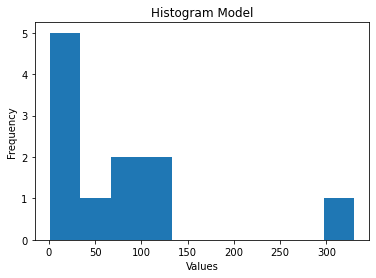

In [10]:
call_method = Gaussian()

call_method.read_data_file('numbers.txt')

print(call_method)
call_method.plot_histogram()